# Population growth and evolution

The purpose of this document is to help Illinois high school science/math teachers comply with the Next Generation Science Standards by providing worked examples for the following learning requirements:

**HS-LS2**

1. Use mathematical and/or computational representations to support explanations of factors that affect carrying capacity of ecosystems at different scales. (HS-LS2-1)
1. Evaluate claims, evidence, and reasoning that the complex interactions in ecosystems maintain relatively consistent numbers and types of organisms in stable conditions, but changing conditions may result in a new ecosystem. (HS-LS2-6)
1. 	Design, evaluate, and refine a solution for reducing the impacts of human activities on the environment and biodiversity. (HS-LS2-7)

**HS-LS3**

1. Apply concepts of statistics and probability to explain the variation and distribution of expressed traits in a population. (HS-LS3-3)


**HS-LS4**

1. Construct an explanation based on evidence that the process of evolution primarily results from four factors: (1) the potential for a species to increase in number, (2) the heritable genetic variation of individuals in a species due to mutation and sexual reproduction, (3) competition for limited resources, and (4) the proliferation of those organisms that are better able to survive and reproduce in the environment. (HS-LS4-2)
1. Apply concepts of statistics and probability to support explanations that organisms with an advantageous heritable trait tend to increase in proportion to organisms lacking this trait. (HS-LS4-3)
1. Construct an explanation based on evidence for how natural selection leads to adaptation of populations. (HS-LS4-4)
1. Evaluate the evidence supporting claims that changes in environmental conditions may result in (1) increases in the number of individuals of some species, (2) the emergence of new species over time, and (3) the extinction of other species. (HS-LS4-5)
1. Create or revise a simulation to test a solution to mitigate adverse impacts of human activity on biodiversity. (HS-LS4-6)

Additionally, this entire lab project was developed with the chromebook in mind.
Everything here should be completely accessible to someone using a chromebook with access to google drive and the internet.

# Python and R (and coding in general)

&nbsp;
Python is a programming language primarily suited for development while R is suited for data analysis.
In my experience it's a mistake to choose one language and eschew others: learn as many as possible because  it's hard to know which will be the most useful to you in the future.
Also, keep in mind that these are not the only languages.

&nbsp;
The nice thing about learning code is that there's a certain logical flow that seems to be consistent between languages.
Named functions and syntax may differ, but the logic will be very similar in general.
In this document I will try to provide examples of both python and R code.


&nbsp;
Also: my degree is not in computer science, and there may be better and more efficient ways of writing this code.
That's fine.
Your own code doesn't have to be perfect the first time around.
It doesn't have to be perfect ever.
Just make sure that it does what you want, and make improvements as you learn.

## Enable R within Python

The following code allows us to use the R language and R commands within Python.

Any code that starts with "%%R" is using the R programming language.
If that prompt is not present then the code is Python.


In [0]:
# The following code lets us speak in the R language while working from within Python

%load_ext rpy2.ipython

# Using R inside python in this way tends to produce warnings
# The warnings don't seem to have an effect on the desired output, so I'm just going to suppress the warnings.
# You can go ahead and run the code with and without warnings by excluding/including the following code:

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

# To comment out code, just use the pound sign (hashtag) "#"
# Code that's been commented out will not be run, just like this comment I'm writing right now.
# Comments help us in two major ways:
#   1. You can easily leave instructions or clarifications in your code for other people or for future you.
#   2. You can see how your code runs without certain lines of code without actually deleting your code.
#       My advice: Try not to delete your code. You may change your mind later, and it's good to have it readily available.

## Markdown

&nbsp;
The text portions of this document are written in markdown.
Markdown can fairly easily be converted to .doc, .pdf, and html using pandoc.
I believe that Google Colab just converts everything to html on the fly, and that there are currently no .doc and .pdf options (as far as I know).
However, these options do exist within programs like Rstudio (an integrated development environment (IDE) for R) and it's very useful for creating statistical reports.

[See the guide for more details](https://www.markdownguide.org/basic-syntax/)

# Population growth

Before we start talking about carrying capacities and evolution, we should at least have a reasonable mathematical representation of how we can think about population growth.
There are many different ways to model population growth, but we'll focus on just two of them here.

## Geometric growth

Geometric growth occurs when the population growth rate remains constant and there are very few or no environmental limitations.
This type of growth is common during the early stages of population growth but generally does not continue for very long.
Additionally, geometric growth is used to describe populations that reproduce in a pulsed, all at the same time.
To make this more clear, think about how annual plants reproduce compared to humans.
Members from an annual plant species germinate and reproduce at approximately the same times every year.
By contrast, humans can continually reproduce all year.
It turns out that these two types of populations are described by different (but analagous) models.

Let $P_{t}$ represent the population size at time $t$, $P_{t+1}$ represent the population size at time $t+1$ and $r$ represent the *per capita* rate of increase.

$$P_{t+1} =  P_{t} + r \cdot P_{t}$$

That is to say, the future population size is a function of the current population size as well as a rate of population growth.

Let's take a look at how $r$ affects the relationship between $P_{t}$ and $P_{t+1}$.
First, observe that if $r$ is equal to zero then:

$$P_{t+1} =  P_{t}$$

If there's no net growth then the population stays the same size.

What about positive or negative values of $r$?
Let's rearange our equation to answer this question. 


$$\frac{P_{t+1}-P_{t}}{P_{t}} =   r  $$


Notice that if $P_{t+1} <  P_{t}$ then $r$ will be negative.
Another way to say that is if we have a negative population growth rate then our population will decline over time.

Similarly, if $P_{t+1} >  P_{t}$ then $r$ will be positive.

Texts may represent the equation like this:

$$P_{t+1} =  P_{t} \cdot (1 + r)$$
$$P_{t+1} =  P_{t} \cdot \lambda$$

Let's graph it!

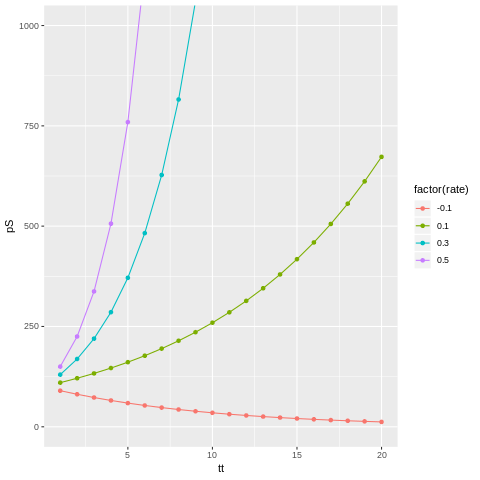

In [8]:
%%R # This tells python that we're speaking in "R" rather than "python"
# Notice that curly brackets in R take the place of indents in python
# Also, notice that for these simulation exmaples there is no outside data.
#  Everything you see comes from the functions and loops that we create here.

library(ggplot2)

geo_pop = function(rate, pop_initial, years){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        size = size + rate*size
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

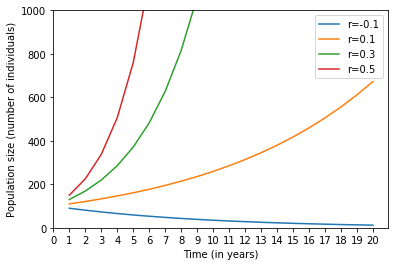

In [9]:
# This is Python code
# I first start by importing "modules" help me graph data and label plots.
# Notice that the pound sign (#) or hashtag results in commenting-out a line of code
# Lines that are commented out will not be run.
#   It's good for notes and comments.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Now we have to define (def) a function (named geo_pop) that will simulate population growth
# Note that we allow the function to take on 3 arguments (inputs):
#   rate, pop_initial, and years.
# 

def geo_pop(rate,pop_initial,years):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=1
    
    while currentyear <= years:
        
        size += rate*size
        
        pS.append(size)
        tt.append(currentyear)     
    
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = geo_pop(r,100,20)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0,1000)
plt.legend()
plt.show()

### Exercise

1. Our equation for geometric growth is 
$$P_{t+1} =  P_{t} + r \cdot P_{t}$$
Notice that, in this form, we need to know $P_t$ to calculate $P_{t+1}$.
But what if I want to know $P_{1000}$ and all the information I have is $r$ and $P_0$.
Do I have to calculate every population value to get $P_{1000}$ or is there a shortcut?

1. Notice that in the exponential graph I've provided that we start at time $t=1$. Why is that? Are you able to rewrite the code so that we start at time $t=0$?

1. Do you think that an geometric model for population growth is useful? Why or why not? What are the benefits and limitations of the model?

#### Solutions

Remember that there may be many solutions to a problem, especially a coding problem.
Your code may be different but still be correct.
The important thing is to determine if the logic behind your code makes sense, and whether or not you get the same answer.

##### Question 1





Let's tackle this question by considering the population size at time $t=3$, $P_3$.

$$P_3 = P_2 + r*P_2$$

which is equal to:

$$P_3 = P_2 \cdot (1 + r)$$

Also:

$$P_2 = P_1 \cdot (1 + r)$$

$$P_1 = P_0 \cdot (1 + r)$$

So we an rewrite the first equation as:

$$P_3 = P_1 \cdot (1 + r) \cdot (1 + r)$$
$$P_3 = P_0 \cdot (1 + r)  \cdot (1 + r) \cdot (1 + r)$$

finally

$$P_3 = P_0 \cdot (1 + r)^3$$.

This is an equation of the form

$$y = c \cdot x^n$$

where $c$ is a constant.

If we want to calculate the population size at time $t=n$ then the equation would be:

$$P_n = P_0 \cdot (1 + r)^n$$.


##### Question 2

**In R**

We move the `df[currentyear, x]` statements ahead of the `size = size + rate*size` statement.
This allows us to store the initial starting values before modifying them with the loop.

**In python**

Just like in R, we can simply move the `.append` arguments up within the `exp_pop` function and then set our starting current year to 0.
Now the first thing that the function will do is set our starting population value as the first value within our list.
We can now start at year = 0 and have everything make sense.

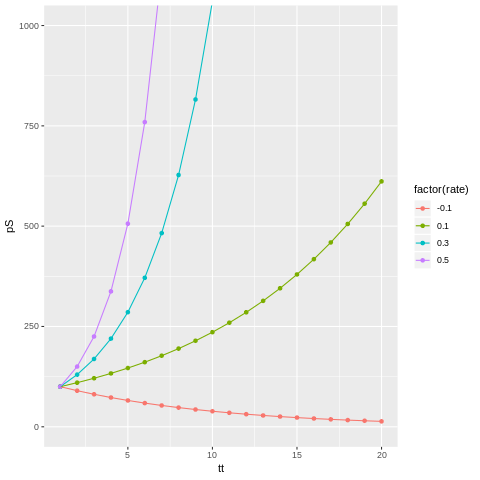

In [10]:
%%R 
library(ggplot2)

geo_pop = function(rate, pop_initial, years){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        size = size + rate*size        
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

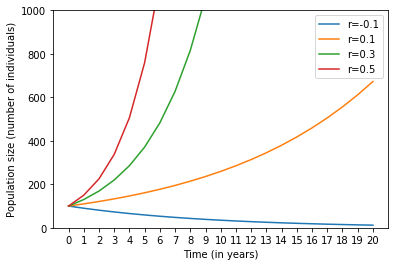

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def exp_pop(rate,pop_initial,years):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=0
    
    while currentyear <= years:
        
        pS.append(size)
        tt.append(currentyear)
        size += rate*size
     
      
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = exp_pop(r,100,20)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.xticks(np.arange(0,21, 1.0))
plt.ylim(0,1000)
plt.legend()
plt.show()

##### Question 3

It could be useful.
It really depends on whether the population seems to be well-described by an geometric model at the time of interest.
Populations don't increase geometrically forever, though, and our current model doesn't account for that.
In the next section we'll discuss one possible way of including a "cap" on population growth.

Additionally, geometric growth occurs when members of a population all reproduce at the same time rather than continuously.
Compare the lifecycle of a human to an annual summer plant.
The plant population produces seed at the end of summer or in the fall each and every year.
They don't produce seed in the winter or spring.
Humans, on the other hand, can reproduce all year long.
Geometric models are appropriate for the plant growth (discrete time) and not human growth (continuous time).

## Discrete Logistic growth

Geometric growth is not a reasonable model when the population is contrained by resources.
We have to introduce the concept of **carrying capacity ($K$)**.

Essentially, an area with finite resources (which is every area) has a limit on the population that it can support.
This limit is called the carrying capacity and is equal to the total number of individuals from a population that a specific area can support.
We'll need to account for this in our model somehow.

One way to do this is to include a new term $1-\frac{P_t}{K}$.
Our geometric equation becomes

$$P_{t+1} =  P_{t} + r \cdot P_{t} \cdot (1-\frac{P_t}{K})$$

Think about this new term as a dynamic adjustment to $r$.
When the population ($P_t$) is very small compared to the carrying capacity then
$$1-\frac{P_t}{K} \approx 1-\frac{0}{K} \approx 1$$
indicating no adjustment to $r$. 
$$r \cdot P_t \cdot 1 = r \cdot P_t$$ 

However, as the population increases we apply larger and larger penalties to $r$.

What if $P_t = \frac{1}{2}K$?

$$1-\frac{P_t}{K} = 1-\frac{1}{2} = \frac{1}{2}$$
$$r \cdot P_t \cdot \frac{1}{2} = \frac{1}{2}r \cdot P_t$$

What if $P_t = K$

$$1-\frac{K}{K} = 1-1 = 0$$
$$r \cdot P_t \cdot 0 = 0\cdot r \cdot P_t = 0$$

Again, we can do this in R and Python.
We should be able to reuse most of our previous code, however, we'll need to add in an argument for carrying capacity.






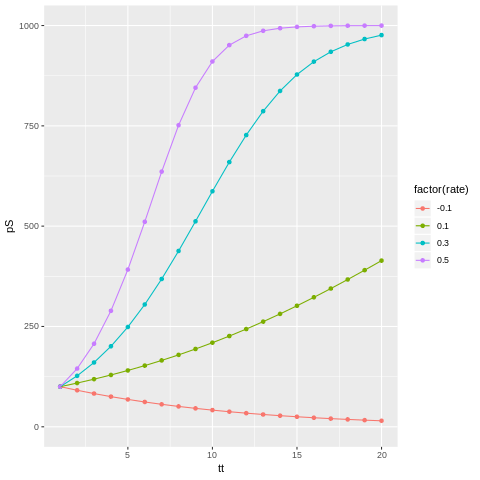

In [12]:
%%R 
library(ggplot2)

geo_pop = function(rate, pop_initial, years, capacity){
    size = pop_initial
    
    df = data.frame(tt = as.numeric(),
                   pS = as.numeric(),
                   rate = as.numeric())
    
    currentyear = 1
    
    while (currentyear <= years){
        
        df[currentyear,1] = currentyear
        df[currentyear,2] = size
        df[currentyear,3] = rate
        
        size = size + rate*size*(1-size/capacity)        
        
        currentyear = currentyear + 1
    }
    return(df)
}

r = -0.1

df1 = data.frame(tt = as.numeric(),
               pS = as.numeric(),
               rate = as.numeric())

while (r <= 0.5){
    df = geo_pop(r,100,20, 1000)
    df1 = rbind(df1,df)
    
    r = r + 0.2
}

plot = ggplot(df1, aes(x = tt, y = pS, group = factor(rate), color = factor(rate)))
plot = plot + geom_point()
plot = plot + geom_line() +
        coord_cartesian(ylim=c(0, 1000))
plot

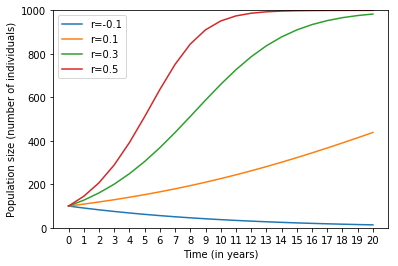

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def log_pop(rate,pop_initial,years,capacity):
    size = pop_initial

    # time t
    tt = []

    #population size 
    pS = []
    
    currentyear=0
    
    while currentyear <= years:
        
        pS.append(size)
        tt.append(currentyear) 
        
        size += rate*size*(1-size/capacity)         
    
        currentyear += 1
    return tt,pS

r = -0.1
while r <= .5:
    tt,pS = log_pop(r,100,20,1000)
    plt.plot(tt, pS,label="r="+str(round(r,2)))
    r += .2

plt.ylabel('Population size (number of individuals)')
plt.xlabel('Time (in years)')
plt.legend()
plt.xticks(np.arange(0,21, 1.0))
plt.ylim(0,1000)
plt.show()

# Appendix

I will try to provide some extra worked examples for coding problems here.
However, there are extremely good online resources for learning Python.
Here are two to get you started.
Note that you can set the video speed to 1.5x or 1.75x and still be able to follow along.

## What is a loop?

Loops are common ways of repeating a task multiple times and they're used in many different software languages.
They aren't always the most efficient way to perform a task, however they tend to be much more customizable and clear than pre-packaged functions.

Let's start with a simple **for** loop that lists all the numbers between 1 and 5.



In [2]:
for x in range(1, 6):
  print(x)

1
2
3
4
5


Notice that to list all the whole numbers between 1 and 5 we have to set the **range** bound as [1, 6].
This is just how python works, other programs (such as R) do not have this quirk (it has many others instead).

Another "quirk" of python is that it starts counting (and indexing) at zero rather than 1.

Try it for yourself.

Write a **for** loop that displays the whole numbers from 0 to 10.
Write a **for** loop that displays the whole numbers from 13 to 22.

In [14]:
for x in range(6):
  print(x)

0
1
2
3
4
5


In [15]:
for x in range(3,6):
  print(x)

3
4
5


There are a few different loop types.
We use a **while** loop for the population simulation.
This type of loop will continue performing an action so long as a condition remains true.
For the population model that condition was that the year number was less than some total year number (effectively the same as the **for** loop in that scenario).


### Use case for loops: Examples
#### Summation

What if we wanted to add all the whole numbers between 1 and 10?
That is, what if we wanted:

$$\sum_{i=1}^{10}i$$

We could do this on a calculator, however, if the range of values was a lot larger this would take us some time.
Instead, why not write a loop?

In [16]:
a=0
for i in range(1,11):
  a += i # Note that a += i is equal to a = a + i

print(a)

55


#### Multiplication

We can, of course, do this for multiplication as well.
Just be careful not to set our starting value to 0 as we did for the summation.

$$\prod_{i=1}^{5}i$$

In [17]:
a=1
for i in range(1,6):
  a=a*i
print(a)

120


#### Simulation experiments

We used a **while** loop to perform our population simulation.
Practiacally, we wanted to track the population change year to year over several years using a simple exponential relationship.
We could have done that manually but why?
Do it with loops.

Thie 

#Random number generation



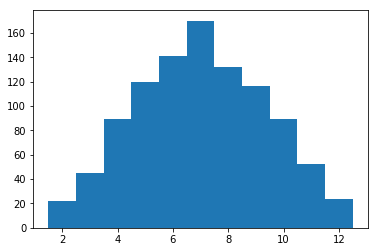

[51.137762633722765]


In [3]:
#@title Default title text
import pylab
import random
samples = 1000
dice = []
for i in range(samples):
    total = random.randint(1,6) + random.randint(1,6)
    dice.append(total)
pylab.hist(dice, bins= pylab.arange(1.5,12.6,1.0))
pylab.show()

norm = []
norm.append(random.normalvariate(50,1))
print(norm)

## Importing and using data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving pop_growth.csv to pop_growth.csv


In [5]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['pop_growth.csv']))
df2

#df2.boxplot(by='family', 
#                       column=['secondyear'], 
#                       grid=False)

,Unnamed: 0,species,family,native_stat,firstyear,secondyear,thirdyear,fourthyear,fifthyear
0,1,1,poaceae,alien,477,477.927059,534.015086,548.911532,622.885893
1,2,1,poaceae,alien,628,710.277915,769.827191,849.376737,822.823495
2,3,1,poaceae,alien,536,640.477762,731.042154,738.809869,704.107541
3,4,1,poaceae,alien,491,561.292907,696.308337,727.437931,762.570918
4,5,1,poaceae,alien,463,459.031592,430.786895,455.515709,512.179602
5,6,1,poaceae,alien,426,430.757292,455.681916,443.262940,469.295244
6,7,1,poaceae,alien,505,569.759672,469.482414,477.472623,549.935103
7,8,1,poaceae,alien,464,485.183218,544.609830,605.537191,670.871874
8,9,1,poaceae,alien,470,559.305425,588.312067,658.251425,614.641237
9,10,1,poaceae,alien,538,570.616667,655.201867,721.932652,748.709714


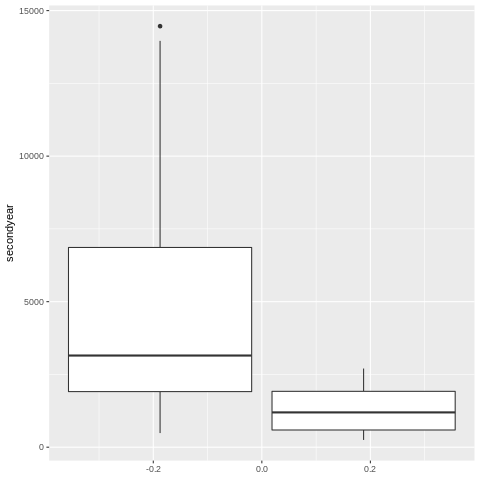

In [18]:
#@title
%%R
library(ggplot2)

df1 = read.csv("pop_growth.csv")
plot = ggplot(df1, aes(y=secondyear,group=family))
plot = plot + geom_boxplot()
plot